In [8]:
!pip uninstall Cython -y # fix the "No module named 'object_detection'" error
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4088, done.
remote: Counting objects: 100% (4088/4088), done.
remote: Compressing objects: 100% (3089/3089), done.
remote: Total 4088 (delta 1184), reused 2008 (delta 938), pack-reused 0
Receiving objects: 100% (4088/4088), 46.33 MiB | 25.62 MiB/s, done.
Resolving deltas: 100% (1184/1184), done.


In [9]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.     # activating the protocols and placing the output in the current directory, btw the function output nothing

In [10]:
import re
with open('/content/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()


# Overwrite the data stored in s then save it in '/content/models/research/setup.py'
with open('/content/models/research/setup.py', 'w') as f:
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [11]:
!pip install pyyaml==5.3
!pip install /content/models/research/


!pip install tensorflow==2.8.0


# tf 2.8.0 is compatible with CUDA 11.0 - Not needed to be installed if you are using a pure cpu
# for more info https://stackoverflow.com/questions/50622525/which-tensorflow-and-cuda-version-combinations-are-compatible

!pip install tensorflow_io==0.23.1
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!apt-key add /var/cuda-repo-ubuntu1804-11-0-local/7fa2af80.pub
!apt-get update && sudo apt-get install cuda-toolkit-11-0
!export LD_LIBRARY_PATH=/usr/local/cuda-11.0/lib64:$LD_LIBRARY_PATH

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.2/268.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.3-cp310-cp310-linux_x86_64.whl size=44244 sha256=0a852d10d46280146fb7e1c97b43bfdd9b62498a464a3a9a3a6f99da4f3bfa02
  Stored in directory: /root/.cache/pip/wheels/0d/72/68/a263cfc14175636cf26bada99f13b735be1b60a11318e08bfc
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2023.8.1 requires pyyaml>=5.3.1, but you have pyyaml 5.3 which is incompatible.
distributed 2023.8.1 requires pyyaml>=5.3.1, but you have pyyaml 5.3 which is incompatible.
flax 0.8.2 requires PyYAML>=5.4.1, but you have pyyaml 5.3 which is incompatible

--2024-04-29 14:50:01--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu1804.pin’

cuda-ubuntu1804.pin 100%[===================>]     190  --.-KB/s    in 0s      

2024-04-29 14:50:01 (2.91 MB/s) - ‘cuda-ubuntu1804.pin’ saved [190/190]

--2024-04-29 14:50:01--  http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:80... connected.
HTTP request sent, awaiting response... 301 Mov

In [12]:
# Test file, to check if everything is working well - everything is good if you get OK at the end
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2024-04-29 14:51:05.048774: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-04-29 14:51:05.048872: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0429 14:51:05.437949 132339295895552 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.88s
I0429 14:51:05.940765 132339295895552 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.88s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_mod

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/datasets/images.zip /content

Mounted at /content/gdrive


In [15]:
!mkdir /content/images
!unzip -q images.zip -d /content/images/all
!mkdir /content/images/train; mkdir /content/images/validation; mkdir /content/images/test

In [16]:
!wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/train_val_test_split.py
!python train_val_test_split.py

--2024-04-29 15:22:12--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/train_val_test_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3100 (3.0K) [text/plain]
Saving to: ‘train_val_test_split.py’

train_val_test_spli 100%[===================>]   3.03K  --.-KB/s    in 0s      

2024-04-29 15:22:13 (52.1 MB/s) - ‘train_val_test_split.py’ saved [3100/3100]

Total images: 28
Images moving to train: 22
Images moving to validation: 2
Images moving to test: 4


In [17]:
# creating a labelmap.txt
%%bash
cat <<EOF >> /content/labelmap.txt      # <<EOF  allows you to input multiple lines of text into a command.
matricule
name
EOF

In [18]:
# i got the files from here https://github.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/tree/master
! wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py     # XML to CSV
! wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py

--2024-04-29 16:08:28--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1348 (1.3K) [text/plain]
Saving to: ‘create_csv.py’

create_csv.py       100%[===================>]   1.32K  --.-KB/s    in 0s      

2024-04-29 16:08:28 (50.0 MB/s) - ‘create_csv.py’ saved [1348/1348]

--2024-04-29 16:08:28--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [19]:
# creating TFrecords to store the train and validation examples
!python create_csv.py
!python create_tfrecord.py --csv_input=images/train_labels.csv --labelmap=labelmap.txt --image_dir=images/train --output_path=train.tfrecord
!python create_tfrecord.py --csv_input=images/validation_labels.csv --labelmap=labelmap.txt --image_dir=images/validation --output_path=val.tfrecord

Successfully converted xml to csv.
Successfully converted xml to csv.
2024-04-29 16:13:29.923629: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-04-29 16:13:29.923719: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
Traceback (most recent call last):
  File "/content/create_tfrecord.py", line 120, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/platform/app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/content/crea

In [20]:
train_record_fname = '/content/train.tfrecord'    # stores training TFrecords
val_record_fname = '/content/val.tfrecord'    # stores validation TFrecords
label_map_pbtxt_fname = '/content/labelmap.pbtxt'   # stores labelmap

In [21]:
# url of the model http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
model_name = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
pretrained_checkpoint = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
base_pipeline_file = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'   # there is a file in the model that have this name

In [22]:
# Create "mymodel" folder for holding pre-trained weights and configuration files
%mkdir /content/models/mymodel/
%cd /content/models/mymodel/

# Download pre-trained model weights
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

# Download training configuration file for model
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

/content/models/mymodel
--2024-04-29 17:00:13--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.97.207, 142.251.107.207, 74.125.196.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.97.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M   116MB/s    in 0.2s    

2024-04-29 17:00:14 (116 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

--2024-04-29 17:00:14--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.1

In [31]:
num_steps = 15000

batch_size = 5

In [32]:
# Set file locations and get number of classes for config file
pipeline_fname = '/content/models/mymodel/' + base_pipeline_file
fine_tune_checkpoint = '/content/models/mymodel/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
print('Total classes:', num_classes)


Total classes: 2


In [33]:
import re

%cd /content/models/mymodel
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:

    # Set fine_tune_checkpoint path
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)

    # Set tfrecord files for train and test datasets
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(val_record_fname), s)

    # Set label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set batch_size
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)

    # Set number of classes num_classes
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)

    # Change fine-tune checkpoint type from "classification" to "detection"
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)

    # for ssd-mobilenet-v2, we are reducing the learning rate (because it's too high in the default config file)
    s = re.sub('learning_rate_base: .8',
                 'learning_rate_base: .08', s)

    s = re.sub('warmup_learning_rate: 0.13333',
                 'warmup_learning_rate: .026666', s)

    f.write(s)

/content/models/mymodel
writing custom configuration file


In [34]:
# The config we re going to train with
!cat /content/models/mymodel/pipeline_file.config

# SSD with Mobilenet v2 FPN-lite (go/fpn-lite) feature extractor, shared box
# predictor and focal loss (a mobile version of Retinanet).
# Retinanet: see Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from Imagenet classification checkpoint
# Train on TPU-8
#
# Achieves 22.2 mAP on COCO17 Val

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 2
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      multiscale_anchor_generator {

In [35]:
pipeline_file = '/content/models/mymodel/pipeline_file.config'
model_dir = '/content/training/'    # where the trained model and training checkpoints will be saved

In [40]:
# --alsologtostderr is used so that the script output some information while training like steps completed
# if --sample_1_of_n_eval_examples=3 for example it means that the model will evaluate the results of training every 3 examples using the validation dataset

!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

KeyboardInterrupt: 

In [41]:
# Now we re going to convert the model to TF Lite so that the model can be lighter.
# Quantization: working with 8-bits instead of 32-bits
# Optimization: applying some reductions without losing a lot of information, like PCA that we studied in Fekri's session
# and more ...
# for more info about reductions like PCA https://colah.github.io/posts/2014-10-Visualizing-MNIST/

!mkdir /content/custom_model_lite
output_directory = '/content/custom_model_lite'


last_model_path = '/content/training'


# this script is extract the model graph (architecture, weights and biases)
!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}


2024-04-29 19:35:42.443086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-04-29 19:35:42.443239: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
I0429 19:35:47.857311 135864578224128 api.py:441] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0429 19:35:54.316638 135864578224128 api.py:441] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
2024-04-29 19:35:57.398034: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
I0429 19:35:58.556632 135864578224128 api.py:441] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
W0429 19:36:00.147770 135864578224128 save_

In [42]:
# this script is transforming the information of the model graph into a format that TF Lite can understand


import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/custom_model_lite/saved_model')
tflite_model = converter.convert()

with open('/content/custom_model_lite/detect.tflite', 'wb') as f:
  f.write(tflite_model)

In [43]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 51 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (14.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [48]:
import pytesseract
import cv2 as cv



def extract_text(xmin, xmax, ymin, ymax, image_path):
  img = cv.imread(image_path)

  blank = np.zeros(img.shape[:2], dtype='uint8')

  blank_rect = cv.rectangle(blank, (xmin, ymin), (xmax, ymax), (255, 0, 255), -1)

  detected_img = cv.bitwise_and(img, img, mask=blank_rect)

  text = pytesseract.image_to_string(detected_img)
  return text

In [49]:
# The script in the next cell is taken from https://github.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/blob/master/TFLite_detection_image.py
# I am doing some edites so that we can integtrate tesseract and show the names and matricule

In [52]:
import os
import cv2
import numpy as np
import sys
import glob
import random
import importlib.util
from tensorflow.lite.python.interpreter import Interpreter

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Define function for inferencing with TFLite model and displaying results

def tflite_detect_images(modelpath, imgpath, lblpath, min_conf=0.5, num_test_images=10, savepath='/content/results', txt_only=False):

  # Grab filenames of all images in test folder
  images = glob.glob(imgpath + '/*.jpg') + glob.glob(imgpath + '/*.JPG') + glob.glob(imgpath + '/*.png') + glob.glob(imgpath + '/*.bmp')

  # Load the label map into memory
  with open(lblpath, 'r') as f:
      labels = [line.strip() for line in f.readlines()]

  # Load the Tensorflow Lite model into memory
  interpreter = Interpreter(model_path=modelpath)
  interpreter.allocate_tensors()

  # Get model details
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  height = input_details[0]['shape'][1]
  width = input_details[0]['shape'][2]

  float_input = (input_details[0]['dtype'] == np.float32)

  input_mean = 127.5
  input_std = 127.5

  # Randomly select test images
  images_to_test = random.sample(images, num_test_images)

  # Loop over every image and perform detection
  for image_path in images_to_test:

      # Load image and resize to expected shape [1xHxWx3]
      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      imH, imW, _ = image.shape
      image_resized = cv2.resize(image_rgb, (width, height))
      input_data = np.expand_dims(image_resized, axis=0)

      # Normalize pixel values if using a floating model (i.e. if model is non-quantized)
      if float_input:
          input_data = (np.float32(input_data) - input_mean) / input_std

      # Perform the actual detection by running the model with the image as input
      interpreter.set_tensor(input_details[0]['index'],input_data)
      interpreter.invoke()

      # Retrieve detection results
      boxes = interpreter.get_tensor(output_details[1]['index'])[0] # Bounding box coordinates of detected objects
      classes = interpreter.get_tensor(output_details[3]['index'])[0] # Class index of detected objects
      scores = interpreter.get_tensor(output_details[0]['index'])[0] # Confidence of detected objects

      detections = []

      # Loop over all detections and draw detection box if confidence is above minimum threshold
      for i in range(len(scores)):
          if ((scores[i] > min_conf) and (scores[i] <= 1.0)):

              # Get bounding box coordinates and draw box
              # Interpreter can return coordinates that are outside of image dimensions, need to force them to be within image using max() and min()
              ymin = int(max(1,(boxes[i][0] * imH)))
              xmin = int(max(1,(boxes[i][1] * imW)))
              ymax = int(min(imH,(boxes[i][2] * imH)))
              xmax = int(min(imW,(boxes[i][3] * imW)))

              cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

              # Draw label
              object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
              label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
              labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
              label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
              cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
              cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text


              detections.append([object_name, scores[i], xmin, ymin, xmax, ymax])

              print(extract_text(xmin, xmax, ymin, ymax, image_path))

      # All the results have been drawn on the image, now display the image
      if txt_only == False: # "text_only" controls whether we want to display the image results or just save them in .txt files
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12,16))
        plt.imshow(image)
        plt.show()

      # Save detection results in .txt files (for calculating mAP)
      elif txt_only == True:

        # Get filenames and paths
        image_fn = os.path.basename(image_path)
        base_fn, ext = os.path.splitext(image_fn)
        txt_result_fn = base_fn +'.txt'
        txt_savepath = os.path.join(savepath, txt_result_fn)

        # Write results to text file
        # (Using format defined by https://github.com/Cartucho/mAP, which will make it easy to calculate mAP)
        with open(txt_savepath,'w') as f:
            for detection in detections:
                f.write('%s %.4f %d %d %d %d\n' % (detection[0], detection[1], detection[2], detection[3], detection[4], detection[5]))

  return

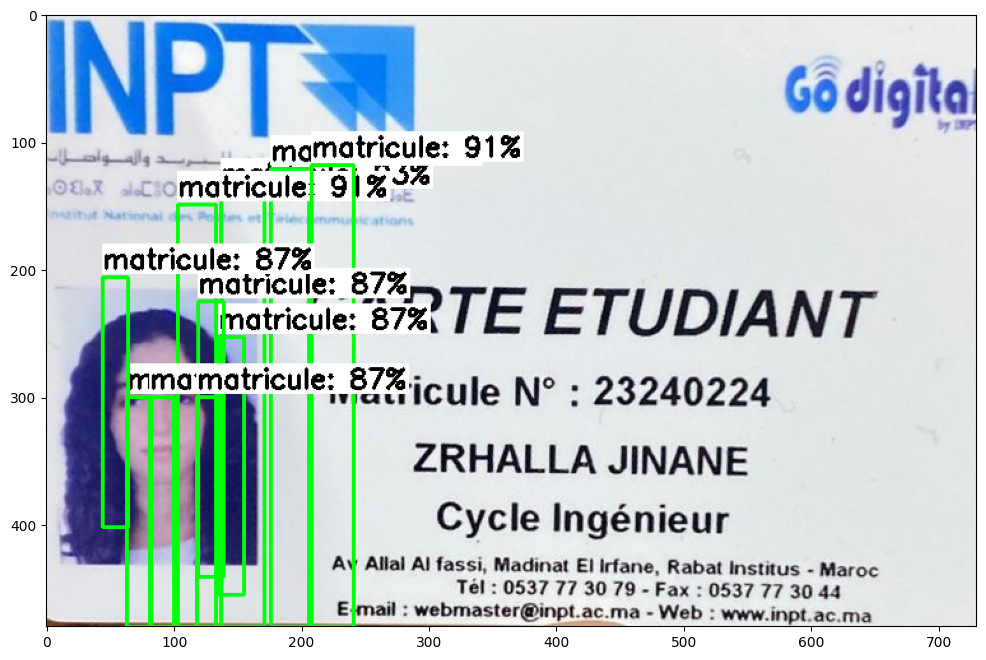

|

 


Av

 

 

 

 


 


Av Allal Al fassi, Madinat El Irfa
Tel: = 77307

 

 



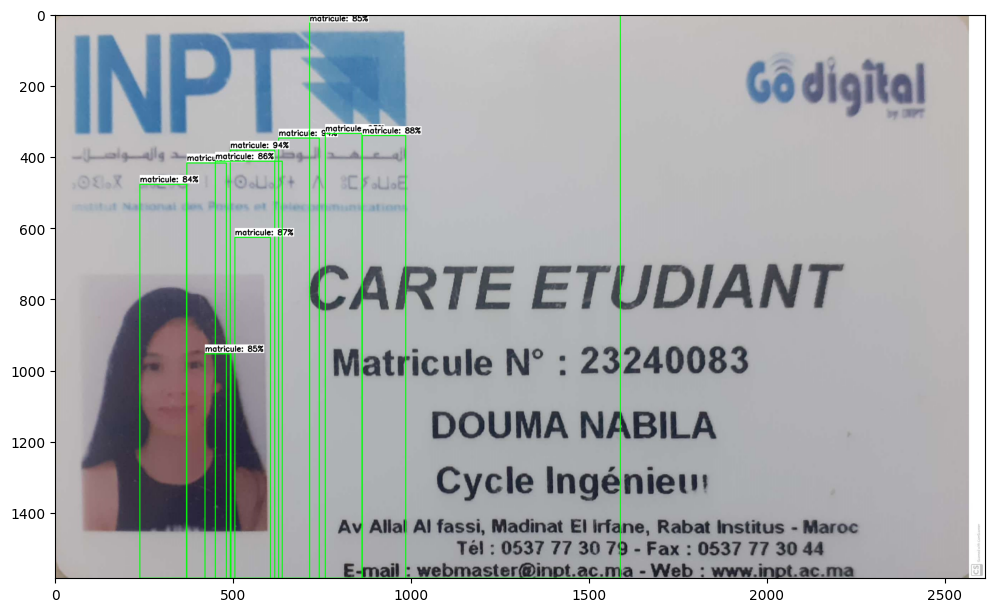



 

 

 

 

that: webmaster@inpt.ac.ma - Web : www.in

 

wpit.ac.ma - Web : www.in


 

 



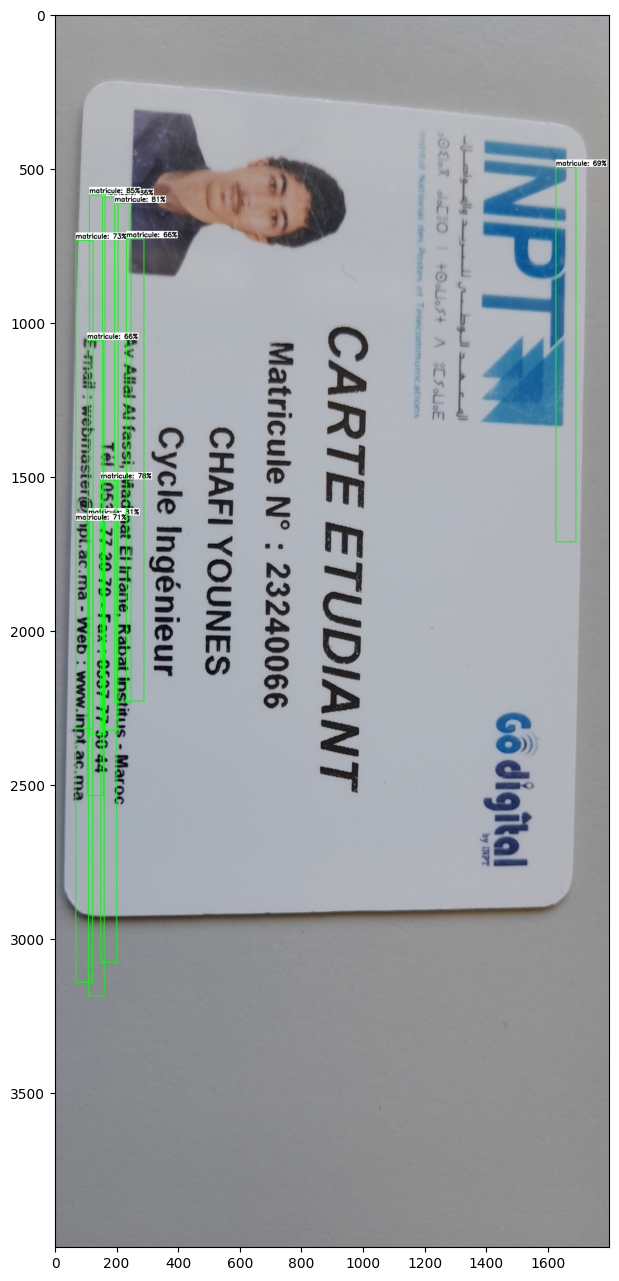

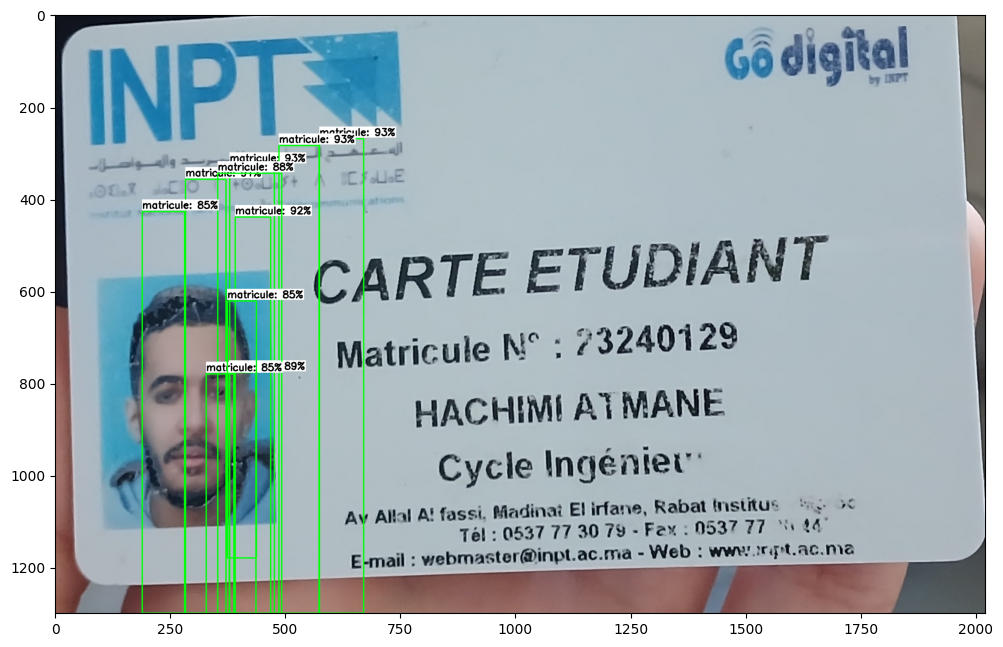

In [53]:
PATH_TO_IMAGES='/content/images/test'
PATH_TO_MODEL='/content/custom_model_lite/detect.tflite'   # Path to .tflite model file
PATH_TO_LABELS='/content/labelmap.txt'   # Path to labelmap.txt file
min_conf_threshold=0.32   # Confidence threshold
images_to_test = 4


tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test)

In [55]:
!cp /content/labelmap.txt /content/custom_model_lite
!cp /content/labelmap.pbtxt /content/custom_model_lite
!cp /content/models/mymodel/pipeline_file.config /content/custom_model_lite

%cd /content
!zip -r custom_model_lite.zip custom_model_lite

/content
  adding: custom_model_lite/ (stored 0%)
  adding: custom_model_lite/labelmap.txt (stored 0%)
  adding: custom_model_lite/labelmap.pbtxt (deflated 32%)
  adding: custom_model_lite/saved_model/ (stored 0%)
  adding: custom_model_lite/saved_model/assets/ (stored 0%)
  adding: custom_model_lite/saved_model/variables/ (stored 0%)
  adding: custom_model_lite/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: custom_model_lite/saved_model/variables/variables.index (deflated 78%)
  adding: custom_model_lite/saved_model/saved_model.pb (deflated 91%)
  adding: custom_model_lite/pipeline_file.config (deflated 65%)
  adding: custom_model_lite/detect.tflite (deflated 9%)


In [56]:
from google.colab import files

files.download('/content/custom_model_lite.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>